# Image Classifier

https://towardsdatascience.com/do-you-know-this-flower-image-classifier-using-pytorch-1d45c3a3df1c


This notebook was provided by Udacity as guide for the project

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below. 

<img src='data/flowers/test/1/image_06760.jpg' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

Please make sure if you are running this notebook in the workspace that you have chosen GPU rather than CPU mode.

In [ ]:
# Create a project folder and move there
!mkdir yolov5-transfer-learning
!cd yolov5-transfer-learning

!apt install python3.8-venv
# Create and activate a Python environment using venv
!python3 -m venv venv

!source venv/bin/activate

# We should always upgrade pip as it's usually old version
# that has older information about libraries
!pip install --upgrade pip

from PIL import Image   # https://pillow.readthedocs.io/en/stable/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl
The following NEW packages will be installed:
  python-pip-whl python3.8-venv
0 upgraded, 2 newly installed, 0 to remove and 22 not upgraded.
Need to get 1,810 kB of archives.
After this operation, 2,339 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python-pip-whl all 20.0.2-5ubuntu1.8 [1,805 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python3.8-venv amd64 3.8.10-0ubuntu1~20.04.6 [5,448 B]
Fetched 1,810 kB in 0s (4,261 kB/s)
Selecting previously unselected package python-pip-whl.
(Reading database ... 128215 files and directories currently installed.)
Preparing to unpack .../python-pip-whl_20.0.2-5ubuntu1.8_all.deb ...
Unpacking python-pip-whl (20.0.2-5ubuntu1.8) ...
Selecting previously unselected package python3.8-venv.
Preparing 

## Load the data

dataset is cloned from the kind mr. Alexey Grigorev git repository.
The dataset is split into three parts, training, validation, and testing. 

In [ ]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 32.96 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
import os
dir_path = 'clothing-dataset-small/test'

# A dictionary to store the subdirectories and their number
subdirs = {}

# A counter to assign a number to each subdirectory
counter = 0

# Scan the directory for subdirectories
for root, dirs, files in os.walk(dir_path):
    for subdir in dirs:
        subdirs[subdir] = counter
        counter += 1
print(subdirs)

{'pants': 0, 'skirt': 1, 'dress': 2, 'hat': 3, 'shorts': 4, 't-shirt': 5, 'shoes': 6, 'shirt': 7, 'longsleeve': 8, 'outwear': 9}


In [ ]:
!mv /content/clothing-dataset-small/validation /content/clothing-dataset-small/val

In [ ]:
import os

# Create a folder structure for YOLOv5 training
if not os.path.exists('data'):
    for folder in ['images', 'labels']:
        for split in ['train', 'val', 'test']:
            os.makedirs(f'data/{folder}/{split}')

In [ ]:
import shutil

directory = '/content/clothing-dataset-small/'
alt_directory = '/content/'
subDTypes = ['test/', 'val/', 'train/']
counter = 0
# loop through each file in the directory
for subT in subDTypes:
  for subD in subdirs:
    for root, dirs, files in os.walk(directory + subT + subD):
          for filename in files:
                # check if the file is a JPG file
                if filename.endswith(".jpg"):
                    shutil.copy2(os.path.join(directory + subT + subD,filename), alt_directory + 'data/images/' + subT)
                    # create the text file with the same name and path as the JPG file
                    with open(os.path.join(alt_directory + 'data/labels/' + subT, filename.replace(".jpg", ".txt")), "w") as f:
                        # write some sample text to the text file
                        f.write(str(subdirs[subD]))
                        file_path = directory + subT + subD + '/' + filename
                        img = Image.open(file_path)
                        # Get the bounding box of the image
                        # bbox = img.getbbox()
                        #f.write(' ' + str(bbox[0]) + ' ' + str(bbox[1]) + ' ' + str(bbox[2]) + ' ' + str(bbox[3]) + '\n')
                        f.write(' ' +'0' + ' ' + '0' + ' ' + '1' + ' ' + '1' + '\n')
print(subdirs)

{'pants': 0, 'skirt': 1, 'dress': 2, 'hat': 3, 'shorts': 4, 't-shirt': 5, 'shoes': 6, 'shirt': 7, 'longsleeve': 8, 'outwear': 9}


In [ ]:
!pip install openimages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 11.0 MB/s eta 0:00:00


In [ ]:
!pwd

/content


#Setup
Clone GitHub repository, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5    # use. %cd SwitchFrequencyAnalysis. to change the current working directory for the notebook environment (and not just the subshell that runs your ! command).

!pip install -U -r /content/yolov5/requirements.txt  # install

!pip install torch==1.10.1 torchvision==0.11.2

!mkdir yolov5-transfer-learning
!cd yolov5-transfer-learning
import sys
# appending a path
sys.path.append('yolov5')


from importlib.machinery import SourceFileLoader
import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

Cloning into 'yolov5'...
remote: Enumerating objects: 15287, done.
remote: Total 15287 (delta 0), reused 0 (delta 0), pack-reused 15287
Receiving objects: 100% (15287/15287), 14.12 MiB | 28.46 MiB/s, done.
Resolving deltas: 100% (10490/10490), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.6 MB/s eta 0:00:00
     ━━━━

ImportError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ../content/yolov5/yolov5-transfer-learning/
!cp -r ../content/drive/MyDrive/ColabNotebooks/clothes.yaml /content/yolov5/yolov5-transfer-learning/

#Detect
detect.py runs YOLOv5 inference on a variety of sources, downloading models automatically from the latest YOLOv5 release, and saving results to runs/detect. Example inference sources are:

In [ ]:
!python yolov5/train.py --data yolov5/yolov5-transfer-learning/clothes.yaml --weights yolov5s.pt --epochs 50 --batch 32 --freeze 10

train: weights=yolov5s.pt, cfg=, data=yolov5/yolov5-transfer-learning/clothes.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.10.1+cu102 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, f

In [ ]:
!nvidia-smi

Wed Mar  1 19:27:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Uninstall the current CUDA version
!sudo apt-get --purge remove cuda nvidia* libnvidia-*
!sudo dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!sudo apt-get remove cuda-*
!sudo apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-headless-525-server' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-headless-no-dkms-515-open' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-gds' for glob 'nvidia*'
Note,

In [ ]:
# Installing CUDA 10.0

!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!sudo apt-get update
!wget http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!sudo apt install -y ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!sudo apt-get update

# Install NVIDIA driver
!sudo apt-get -y installnvidia-driver-418

# Install development and runtime libraries (~4GB)
!sudo apt-get install -y \
    cuda-10-0 \
    libcudnn7=7.6.2.24-1+cuda10.0  \
    libcudnn7-dev=7.6.2.24-1+cuda10.0 --allow-change-held-packages

--2023-03-01 19:30:55--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2942 (2.9K) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu1804_10.0.130-1_amd64.deb’

cuda-repo-ubuntu180 100%[===================>]   2.87K  --.-KB/s    in 0s      

2023-03-01 19:30:55 (167 MB/s) - ‘cuda-repo-ubuntu1804_10.0.130-1_amd64.deb’ saved [2942/2942]

Selecting previously unselected package cuda-repo-ubuntu1804.
(Reading database ... 122336 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1804_10.0.130-1_amd64.deb ...
Unpacking cuda-repo-ubuntu1804 (10.0.130-1) ...
Setting up cuda-repo-ubuntu1804 (10.0.130-1) ...

Configuration file '/etc/apt/sources.li

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [ ]:
!sudo dpkg -i "/content/drive/My Drive/Colab Notebooks/nv-tensorrt-repo-ubuntu1804-cuda10.0-trt7.0.0.11-ga-20191216_1-1_amd64.deb"
!sudo apt-key add /var/nv-tensorrt-repo-cuda10.0-trt7.0.0.11-ga-20191216/7fa2af80.pub

!sudo apt-get update

Selecting previously unselected package nv-tensorrt-repo-ubuntu1804-cuda10.0-trt7.0.0.11-ga-20191216.
(Reading database ... 145914 files and directories currently installed.)
Preparing to unpack .../nv-tensorrt-repo-ubuntu1804-cuda10.0-trt7.0.0.11-ga-20191216_1-1_amd64.deb ...
Unpacking nv-tensorrt-repo-ubuntu1804-cuda10.0-trt7.0.0.11-ga-20191216 (1-1) ...
Setting up nv-tensorrt-repo-ubuntu1804-cuda10.0-trt7.0.0.11-ga-20191216 (1-1) ...
OK
Get:1 file:/var/nv-tensorrt-repo-cuda10.0-trt7.0.0.11-ga-20191216  InRelease
Ign:1 file:/var/nv-tensorrt-repo-cuda10.0-trt7.0.0.11-ga-20191216  InRelease
Get:2 file:/var/nv-tensorrt-repo-cuda10.0-trt7.0.0.11-ga-20191216  Release [574 B]
Get:2 file:/var/nv-tensorrt-repo-cuda10.0-trt7.0.0.11-ga-20191216  Release [574 B]
Get:3 file:/var/nv-tensorrt-repo-cuda10.0-trt7.0.0.11-ga-20191216  Release.gpg [836 B]
Get:3 file:/var/nv-tensorrt-repo-cuda10.0-trt7.0.0.11-ga-20191216  Release.gpg [836 B]
Hit:4 http://developer.download.nvidia.com/compute/cuda/repos/

In [ ]:
!sudo apt-get install libnvinfer7=7.0.0-1+cuda10.0 libnvonnxparsers7=7.0.0-1+cuda10.0 libnvparsers7=7.0.0-1+cuda10.0 libnvinfer-plugin7=7.0.0-1+cuda10.0 libnvinfer-dev=7.0.0-1+cuda10.0 libnvonnxparsers-dev=7.0.0-1+cuda10.0 libnvparsers-dev=7.0.0-1+cuda10.0 libnvinfer-plugin-dev=7.0.0-1+cuda10.0 python-libnvinfer=7.0.0-1+cuda10.0 python3-libnvinfer=7.0.0-1+cuda10.0

!sudo apt-mark hold libnvinfer7 libnvonnxparsers7 libnvparsers7 libnvinfer-plugin7 libnvinfer-dev libnvonnxparsers-dev libnvparsers-dev libnvinfer-plugi

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Some packages could not be installed. This may mean that you have
requested an impossible situation or if you are using the unstable
distribution that some required packages have not yet been created
or been moved out of Incoming.
The following information may help to resolve the situation:

The following packages have unmet dependencies:
 python3-libnvinfer : Depends: python3 (< 3.7) but 3.8.2-0ubuntu2 is to be installed
E: Unable to correct problems, you have held broken packages.
libnvinfer7 set on hold.
libnvonnxparsers7 set on hold.
libnvparsers7 set on hold.
libnvinfer-plugin7 set on hold.
libnvinfer-dev set on hold.
libnvonnxparsers-dev set on hold.
libnvparsers-dev set on hold.
E: Unable to locate package libnvinfer-plugi


In [ ]:
!sudo apt-get install tensorrt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Some packages could not be installed. This may mean that you have
requested an impossible situation or if you are using the unstable
distribution that some required packages have not yet been created
or been moved out of Incoming.
The following information may help to resolve the situation:

The following packages have unmet dependencies:
 tensorrt : Depends: libnvinfer-dev (= 8.5.3-1+cuda11.8) but it is not going to be installed
            Depends: libnvinfer-plugin-dev (= 8.5.3-1+cuda11.8) but it is not going to be installed
            Depends: libnvparsers-dev (= 8.5.3-1+cuda11.8) but it is not going to be installed
            Depends: libnvonnxparsers-dev (= 8.5.3-1+cuda11.8) but it is not going to be installed
            Depends: libnvinfer-samples (= 8.5.3-1+cuda11.8) but it is not going to be installed
E: Unable to correct problems, you have held broken packages.


In [ ]:
!dpkg -l | grep TensorRT

In [ ]:
!tensorboard --logdir yolov5/runs/

2023-03-01 20:12:52.596024: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 20:12:55.675036: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-03-01 20:12:55.675269: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/u

In [ ]:
!python yolov5/val.py --data yolov5/yolov5-transfer-learning/clothes.yaml --weights yolov5/runs/train/exp6/weights/best.pt

val: data=yolov5/yolov5-transfer-learning/clothes.yaml, weights=['yolov5/runs/train/exp6/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.10.1+cu102 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "yolov5/val.py", line 409, in <module>
    main(opt)
  File "yolov5/val.py", line 380, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "yolov5/val.py", line 143, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
  File "/content/yolov5/models/common.py", line 344, in __init__
    model = attempt_lo

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/best.pt --img 640 --conf 0.25 --source /content/yolov5/data/images

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp6/weights/best1.pt --img 640 --conf 0.25 --source /content/yolov5/data/images

detect: weights=['/content/yolov5/runs/train/exp6/weights/best1.pt'], source=/content/yolov5/data/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.10.1+cu102 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", line 98, in run
    model = DetectMulti

### Label mapping

You'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [ ]:
#with open('/content/image_classifier_project/data/cat_to_name.json', 'r') as f:
 #   category_label_to_name = json.load(f)
  #  print(category_label_to_name)

# Building and training the classifier

Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from `torchvision.models` to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. Refer to [the rubric](https://review.udacity.com/#!/rubrics/1663/view) for guidance on successfully completing this section. Things you'll need to do:

* Load a [pre-trained network](http://pytorch.org/docs/master/torchvision/models.html) (If you need a starting point, the VGG networks work great and are straightforward to use)
* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
* Train the classifier layers using backpropagation using the pre-trained network to get the features
* Track the loss and accuracy on the validation set to determine the best hyperparameters

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right. Make sure to try different hyperparameters (learning rate, units in the classifier, epochs, etc) to find the best model. Save those hyperparameters to use as default values in the next part of the project.

One last important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module.

In [ ]:
# TODO: Define your transforms for the training, validation, and testing sets
#data_transforms =

degrees_rotation = 30 #54:30
size_crop = 224
size_resize = 256
normalize_mean = [0.485, 0.456, 0.406]  #  normalizing the colors around a point
normalize_std = [0.229, 0.224, 0.225]
batch_size = 32

train_transforms = transforms.Compose([transforms.RandomRotation(degrees_rotation),
                                       transforms.RandomResizedCrop(size_crop),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),  #transfers photos to GPU
                                       transforms.Normalize(normalize_mean, normalize_std)
                                      ])

valid_transforms = transforms.Compose([transforms.Resize(size_resize), 
                                       transforms.CenterCrop(size_crop),
                                       transforms.ToTensor(),
                                       transforms.Normalize(normalize_mean, normalize_std)
                                      ])

test_transforms = transforms.Compose([transforms.Resize(size_resize),
                                      transforms.CenterCrop(size_crop),
                                      transforms.ToTensor(),
                                      transforms.Normalize(normalize_mean, normalize_std)
                                     ])

# TODO: Load the datasets with ImageFolder
#image_datasets = 

train_data = datasets.ImageFolder(train_dir, transform = train_transforms) # טעינת התמונות לאחר הפעלת טרנספורמציות והופך לאובייקט דאטהסט שנקרא טריינדאטה
valid_data = datasets.ImageFolder(valid_dir, transform = valid_transforms)
test_data = datasets.ImageFolder(test_dir, transform = test_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
#dataloaders = 

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

#Freez

In [ ]:
# TODO: Build and train your network

model = models.vgg16(pretrained = True) #רשת קונבולוציה שאומנה על imageNet. pretrained=true לוקחים את הרשת שאומנה כבר Transfer learning
#print(model)
#לקחנו דאטבייס שאומן על דאטהסט מאד גדול ועכשיו אני רוצה לאמן אותה על אובייקט נוסף, אך אין לי הרבה תמונות של אותו אובייקט
#מוסיפים עוד שכבות לרשת הקיימת

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

dropout_probability = 0.5
in_features = 25088 
out_features = 1024

classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(in_features, out_features)), # רשת לינארית
                                        ('drop', nn.Dropout(p = dropout_probability)), # ניטרול ניוטרונים בצורה אקראית
                                        ('relu', nn.ReLU()),  # דומה לסיגמואיד, אם הסיגנל חלש אז הוא לא עובר הלאה
                                        ('fc2', nn.Linear(out_features, number_classes)),
                                        ('output', nn.LogSoftmax(dim = 1)) # המרה להסתברות שהערך הכולל שלה 1
                                       ]))
    
model.classifier = classifier
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Train the network

# Use GPU if it's available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

criterion = nn.NLLLoss()  # פונקציית הפסד 
learning_rate = 0.001 # קצב הלמידה, חיפוש מינימום של פונקציית ההפסד, אפשר להתאים אותו לפונקצייה

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr = learning_rate)
# אופטימייזר מחפש את המינימום הגלובלי
model.to(device)

epochs = 2
validation_step = True

print('Training started')
start_training_time = time.time()

for epoch in range(epochs):
    train_loss = 0
    for inputs, labels in train_loader:     # שמים את התמונות והלייבילים ב GPU
        
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        log_probabilities = model.forward(inputs)
        loss = criterion(log_probabilities, labels)  
        loss.backward()
        optimizer.step()

        train_loss = train_loss + loss.item()
    
    print('\nEpoch: {}/{} '.format(epoch + 1, epochs),
          '\n    Training:\n      Loss: {:.4f}  '.format(train_loss / len(train_loader))
         )
           
    if validation_step == True:
        
        valid_loss = 0
        valid_accuracy = 0
        model.eval()

        with torch.no_grad(): #בתוך קטה הקוד הזה לא יהיו חישובים על הגרדיינט 
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                
                log_probabilities = model.forward(inputs) # מריץ את התמונות במודל
                loss = criterion(log_probabilities, labels) # חישוב האם צדקתי או לא
        
                valid_loss = valid_loss + loss.item() # צבירת ההפסד
        
                # Calculate accuracy
                probabilities = torch.exp(log_probabilities)
                top_probability, top_class = probabilities.topk(1, dim = 1)
                
                equals = top_class == labels.view(*top_class.shape)
                
                valid_accuracy = valid_accuracy + torch.mean(equals.type(torch.FloatTensor)).item()
        
        model.train()
       
        print("\n    Validation:\n      Loss: {:.4f}  ".format(valid_loss / len(valid_loader)),
              "Accuracy: {:.4f}".format(valid_accuracy / len(valid_loader)))
        
end_training_time = time.time()
print('Training ended')

training_time = end_training_time - start_training_time
print('\nTraining time: {:.0f}m {:.0f}s'.format(training_time / 60, training_time % 60))

cuda
Training started

Epoch: 1/2  
    Training:
      Loss: 1.7390  

    Validation:
      Loss: 0.7499   Accuracy: 0.7926

Epoch: 2/2  
    Training:
      Loss: 1.6621  

    Validation:
      Loss: 0.6332   Accuracy: 0.8284
Training ended

Training time: 3m 29s


## Testing your network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. Run the test images through the network and measure the accuracy, the same way you did validation. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [ ]:
# TODO: Do validation on the test set

test_loss = 0
test_accuracy = 0
model.eval()


print('Validation started')
start_time = time.time()

for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    log_probabilities = model.forward(inputs)
    loss = criterion(log_probabilities, labels)

    test_loss = test_loss + loss.item()

    # Calculate accuracy
    probabilities = torch.exp(log_probabilities)
    top_probability, top_class = probabilities.topk(1, dim = 1)

    equals = top_class == labels.view(*top_class.shape)

    test_accuracy = test_accuracy + torch.mean(equals.type(torch.FloatTensor)).item()

end_time = time.time()
print('Validation ended')
validation_time = end_time - start_time
print('Validation time: {:.0f}m {:.0f}s'.format(validation_time / 60, validation_time % 60))

print("\nTest:\n  Loss: {:.4f}  ".format(test_loss / len(test_loader)),
      "Accuracy: {:.4f}".format(test_accuracy / len(test_loader)))

Validation started
Validation ended
Validation time: 0m 11s

Test:
  Loss: 0.6321   Accuracy: 0.8405


## Save the checkpoint

Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: `image_datasets['train'].class_to_idx`. You can attach this to the model as an attribute which makes inference easier later on.

```model.class_to_idx = image_datasets['train'].class_to_idx```

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, `optimizer.state_dict`. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [ ]:
# TODO: Save the checkpoint 

model.class_to_idx = train_data.class_to_idx

checkpoint = {'network': 'vgg16',
              'input_size': in_features,
              'output_size': number_classes,
              'learning_rate': learning_rate,       
              'batch_size': batch_size,
              'classifier' : classifier,
              'epochs': epochs,
              'optimizer': optimizer.state_dict(),
              'state_dict': model.state_dict(),
              'class_to_idx': model.class_to_idx}

torch.save(checkpoint, 'checkpoint.pth')

## Loading the checkpoint

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [ ]:
# TODO: Write a function that loads a checkpoint and rebuilds the model

def load_checkpoint(file_path):
    checkpoint = torch.load(file_path)
    learning_rate = checkpoint['learning_rate']
    model = getattr(torchvision.models, checkpoint['network'])(pretrained=True)
    model.classifier = checkpoint['classifier']
    model.epochs = checkpoint['epochs']
    model.optimizer = checkpoint['optimizer']
    model.load_state_dict(checkpoint['state_dict'])
    model.class_to_idx = checkpoint['class_to_idx']
    
    return model

model = load_checkpoint('checkpoint.pth')
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Inference for classification

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called `predict` that takes an image and a model, then returns the top $K$ most likely classes along with the probabilities. It should look like 

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

First you'll need to handle processing the input image such that it can be used in your network. 

## Image Preprocessing

You'll want to use `PIL` to load the image ([documentation](https://pillow.readthedocs.io/en/latest/reference/Image.html)). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training. 

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the [`thumbnail`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) or [`resize`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so `np_image = np.array(pil_image)`.

As before, the network expects the images to be normalized in a specific way. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`. You'll want to subtract the means from each color channel, then divide by the standard deviation. 

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using [`ndarray.transpose`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.transpose.html). The color channel needs to be first and retain the order of the other two dimensions.

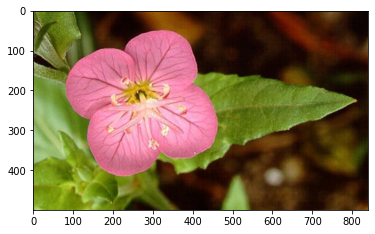

In [ ]:
# Original picture
#flower_class = '1'
#image_path = test_dir + '/' + flower_class + '/' + os.listdir(test_dir + '/' + flower_class + '/')[0]

image_path ='/content/image_classifier_project/data/flowers/test/1/image_06760.jpg'

#print(image_path)

pil_image = Image.open(image_path)
plt.imshow(pil_image)

In [ ]:
# TODO: Process a PIL image for use in a PyTorch model

def process_image(pil_image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    img_loader = transforms.Compose([transforms.Resize(size_resize),
                                     transforms.CenterCrop(size_crop), 
                                     transforms.ToTensor()])
    
    #pil_image = Image.open(image)
    pil_image = img_loader(pil_image).float()
    
    np_image = np.array(pil_image)    
    
    mean = np.array(normalize_mean)
    std = np.array(normalize_std)
    np_image = (np.transpose(np_image, (1, 2, 0)) - mean) / std    
    np_image = np.transpose(np_image, (2, 0, 1))
            
    return np_image

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your `process_image` function works, running the output through this function should return the original image (except for the cropped out portions).

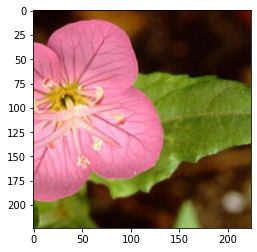

In [ ]:
def imshow(np_image, ax = None, title = None):
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    np_image = np.transpose(np_image, (1, 2, 0))
    
    # Undo preprocessing
    mean = np.array(normalize_mean)
    std = np.array(normalize_std)
    np_image = std * np_image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    np_image = np.clip(np_image, 0, 1)
    
    ax.imshow(np_image)
    
    return ax

imshow(process_image(pil_image))

## Class Prediction

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top-$K$) most probable classes. You'll want to calculate the class probabilities then find the $K$ largest values.

To get the top $K$ largest values in a tensor use [`x.topk(k)`](http://pytorch.org/docs/master/torch.html#torch.topk). This method returns both the highest `k` probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using `class_to_idx` which hopefully you added to the model or from an `ImageFolder` you used to load the data ([see here](#Save-the-checkpoint)). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

In [ ]:
# TODO: Implement the code to predict the class from an image file
    
def predict(pil_image, model, top_k_probabilities = 5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # Use GPU if it's available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    #print(device)

    model.to(device)
    model.eval()
    
    np_image = process_image(pil_image)
    tensor_image = torch.from_numpy(np_image)
    
    inputs = Variable(tensor_image)
    
    if torch.cuda.is_available():
        inputs = Variable(tensor_image.float().cuda())           
        
    inputs = inputs.unsqueeze(dim = 0)
    log_probabilities = model.forward(inputs)
    probabilities = torch.exp(log_probabilities)    

    top_probabilities, top_classes = probabilities.topk(top_k_probabilities, dim = 1)
    #print(top_probabilities)
    #print(top_classes)
    
    class_to_idx_inverted = {model.class_to_idx[c]: c for c in model.class_to_idx}
    top_mapped_classes = list()
    
    for label in top_classes.cpu().detach().numpy()[0]:
        top_mapped_classes.append(class_to_idx_inverted[label])
    
    return top_probabilities.cpu().detach().numpy()[0], top_mapped_classes

top_probabilities, top_classes = predict(pil_image, model, top_k_probabilities = 5)
print(top_probabilities)
print(top_classes)
print([category_label_to_name[c] for c in top_classes])

[0.37574103 0.11608522 0.09368154 0.06304726 0.05374267]
['95', '51', '1', '76', '55']
['bougainvillea', 'petunia', 'pink primrose', 'morning glory', 'pelargonium']


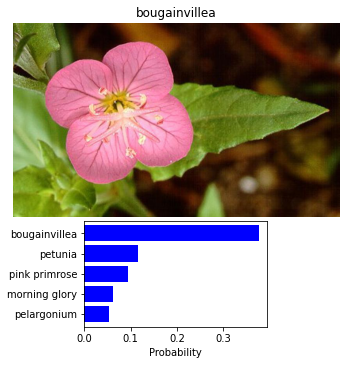

In [ ]:
# Display an image along with the top 5 classes

max_index = np.argmax(top_probabilities)
max_probability = top_probabilities[max_index]
label = top_classes[max_index]

fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot2grid((15,9), (0,0), colspan = 9, rowspan = 9)
ax2 = plt.subplot2grid((15,9), (9,2), colspan = 5, rowspan = 5)

ax1.axis('off')
ax1.set_title(category_label_to_name[label])
ax1.imshow(pil_image)

labels = []
for c in top_classes:
    labels.append(category_label_to_name[c])

y_pos = np.arange(5)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(labels)
ax2.set_xlabel('Probability')
ax2.invert_yaxis()
ax2.barh(y_pos, top_probabilities, xerr = 0, align = 'center', color = 'blue')

plt.show()

## Sanity Checking

Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the testing accuracy is high, it's always good to check that there aren't obvious bugs. Use `matplotlib` to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

<img src='assets/inference_example.png' width=300px>

You can convert from the class integer encoding to actual flower names with the `cat_to_name.json` file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the `imshow` function defined above.

52
/content/image_classifier_project/data/flowers/test/52/image_04240.jpg


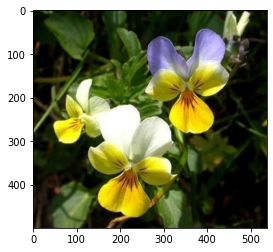

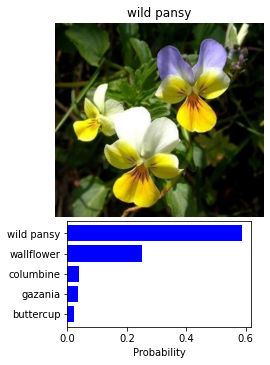

38
/content/image_classifier_project/data/flowers/test/38/image_05812.jpg


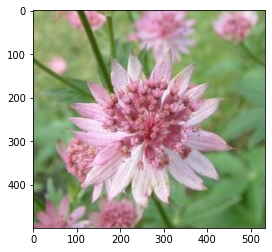

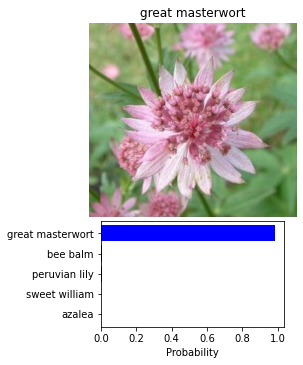

53
/content/image_classifier_project/data/flowers/test/53/image_03672.jpg


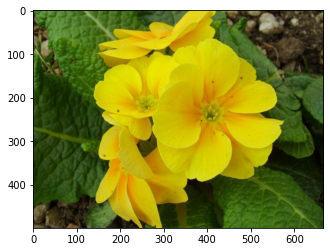

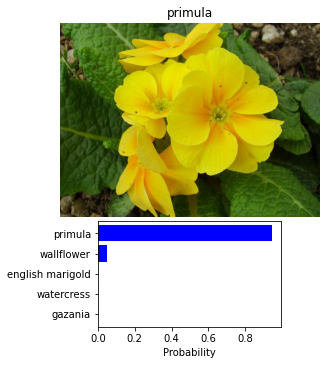

76
/content/image_classifier_project/data/flowers/test/76/image_02479.jpg


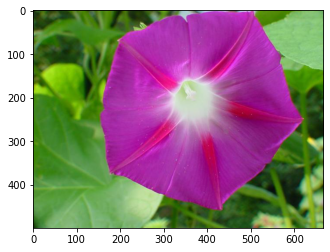

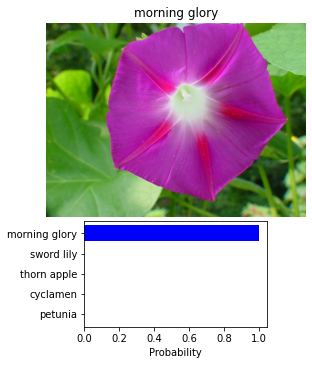

31
/content/image_classifier_project/data/flowers/test/31/image_08070.jpg


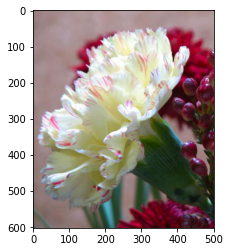

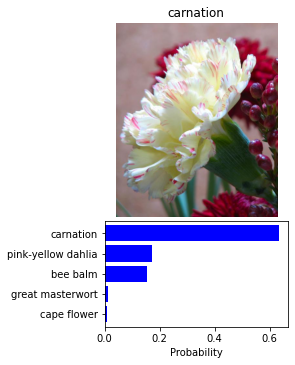

72
/content/image_classifier_project/data/flowers/test/72/image_03593.jpg


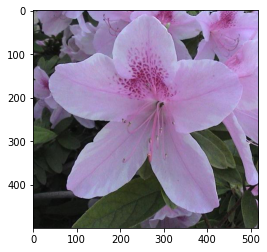

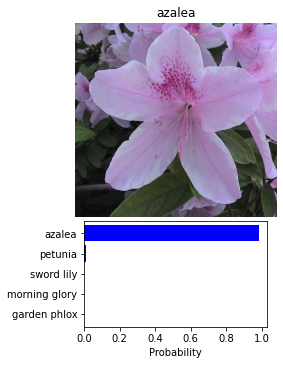

61
/content/image_classifier_project/data/flowers/test/61/image_06266.jpg


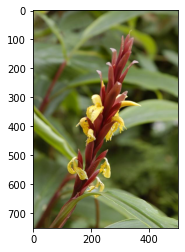

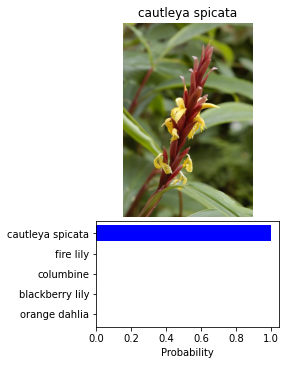

86
/content/image_classifier_project/data/flowers/test/86/image_02893.jpg


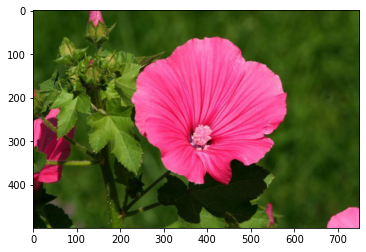

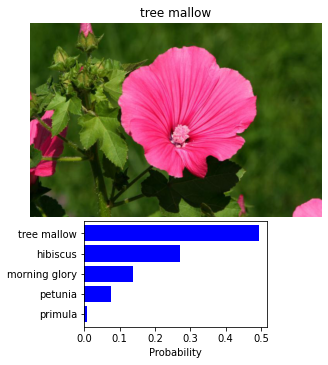

17
/content/image_classifier_project/data/flowers/test/17/image_03864.jpg


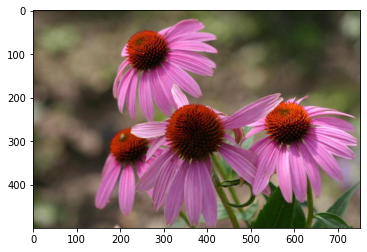

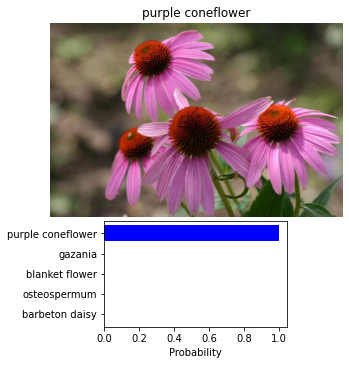

62
/content/image_classifier_project/data/flowers/test/62/image_07276.jpg


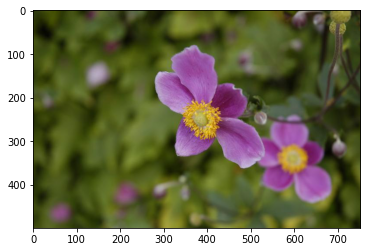

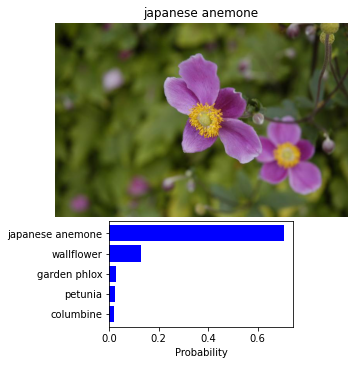

In [ ]:
# TODO: Display an image along with the top 5 classes

test_case = 10

for i in range(test_case):
    flower_class = str(np.random.randint(1, number_classes + 1))
    print(flower_class)
    image_path = test_dir + '/' + flower_class + '/' + os.listdir(test_dir + '/' + flower_class + '/')[0]
    print(image_path)

    pil_image = Image.open(image_path)
    plt.imshow(pil_image)

    top_probabilities, top_classes = predict(pil_image, model, top_k_probabilities = 5)
    max_index = np.argmax(top_probabilities)
    max_probability = top_probabilities[max_index]
    label = top_classes[max_index]

    fig = plt.figure(figsize=(6,6))
    ax1 = plt.subplot2grid((15,9), (0,0), colspan = 9, rowspan = 9)
    ax2 = plt.subplot2grid((15,9), (9,2), colspan = 5, rowspan = 5)

    ax1.axis('off')
    ax1.set_title(category_label_to_name[flower_class]) #Real class
    ax1.imshow(pil_image)

    labels = []
    for c in top_classes:
        labels.append(category_label_to_name[c])

    y_pos = np.arange(5)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(labels)
    ax2.set_xlabel('Probability')
    ax2.invert_yaxis()
    ax2.barh(y_pos, top_probabilities, xerr = 0, align = 'center', color = 'blue')

    plt.show()

In [ ]:
# Imports here

import os

import numpy as np

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision
from torchvision import datasets, transforms, models

from collections import OrderedDict # https://docs.python.org/3/library/collections.html

import json

import time

from PIL import Image   # https://pillow.readthedocs.io/en/stable/